In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [2]:
df4= pd.read_csv('april.csv')
df4

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,30-04-2022 23:56,I love Spotify becuse it shows all the songs i...,5,2,NaN
1,30-04-2022 23:49,Gives you the ability to listen to a plethora ...,5,0,NaN
2,30-04-2022 23:47,I loved the app however for the past months it...,3,0,NaN
3,30-04-2022 23:45,"App keeps closing, after like 6 to 8 songs and...",3,0,NaN
4,30-04-2022 23:36,"While on vacation, Spotify is great for provid...",5,0,NaN
...,...,...,...,...,...
13798,01-04-2022 00:29,"i can't even play my favourite song anymore, w...",2,0,NaN
13799,01-04-2022 00:19,It's a really good music app but sometimes whe...,4,0,NaN
13800,01-04-2022 00:15,Love listening to Spotify anytime anywhere...i...,5,0,NaN
13801,01-04-2022 00:09,Great except I paid for the premium service an...,5,1,NaN


In [3]:
df4= df4[['Review','Rating']]
df4['Length']= df4['Review'].apply(len)
df4.head()

<ipython-input-3-26308600cdfd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Length']= df4['Review'].apply(len)


,Review,Rating,Length
0,I love Spotify becuse it shows all the songs i...,5,168
1,Gives you the ability to listen to a plethora ...,5,183
2,I loved the app however for the past months it...,3,240
3,"App keeps closing, after like 6 to 8 songs and...",3,106
4,"While on vacation, Spotify is great for provid...",5,211


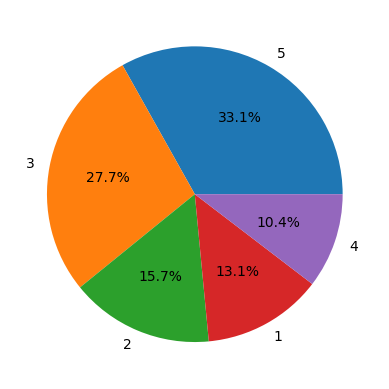

In [4]:
plt.pie(df4['Rating'].value_counts(), labels=df4['Rating'].unique(), autopct='%1.1f%%')
plt.show()

In [5]:
def rating(score):
  if score > 3:
    return 'Positive'
  elif score == 3:
    return 'Neutral'
  else:
    return 'Negative'

### **Data Preprocessing**

In [6]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

def cleaning(text):
    # Converting to lowercase and removing punctuations
    text_clean = text.translate(str.maketrans('', '', string.punctuation)).lower()
    # Removing stopwords
    text_clean = [word for word in text_clean.split() if word not in stopwords.words('english')]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    sentence = [lemmatizer.lemmatize(word, 'v') for word in text_clean]
    return ' '.join(sentence)

df4['Review'] = df4['Review'].apply(cleaning)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-6-5ae80b56e1b7>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Review'] = df4['Review'].apply(cleaning)


In [7]:
pip install afinn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53429 sha256=57be368cca4c5b862052a752aff782d91b18c6e7b60ff38c65b78000a25b00f1
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


In [8]:
!pip install pattern

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 43.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.5/89.5 kB 9.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 67.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.4/348.4 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pattern: filename=Pattern-3.6-py3-none-any.whl size=22332702 sha256=00307c16b2ce50acf89d02271aa12e8acfb68c3e45494f4e3e

In [9]:
import nltk
from nltk.corpus import sentiwordnet as swn
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from afinn import Afinn
from pattern.en import sentiment

nltk.download('vader_lexicon')
nltk.download('sentiwordnet')

def vader_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores['compound']

def textblob_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

def afinn_sentiment(text):
    afinn = Afinn()
    return afinn.score(text)

def sentiwordnet_sentiment(text):
    sentiment_scores = []
    for word in text.split():
        synsets = list(swn.senti_synsets(word))
        if synsets:
            sentiment = synsets[0]
            sentiment_scores.append(sentiment.pos_score() - sentiment.neg_score())
    if sentiment_scores:
        return sum(sentiment_scores) / len(sentiment_scores)
    else:
        return 0

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


In [10]:
df4['VADER Sentiment'] = df4['Review'].apply(vader_sentiment)
df4['TextBlob Sentiment'] = df4['Review'].apply(textblob_sentiment)
df4['AFINN Sentiment'] = df4['Review'].apply(afinn_sentiment)
df4['SentiWordNet Sentiment'] = df4['Review'].apply(sentiwordnet_sentiment)

<ipython-input-10-1e3a65967329>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['VADER Sentiment'] = df4['Review'].apply(vader_sentiment)


Lexicons- Part 1

In [11]:
def map_sentiment(score):
    if score >= 0.04:
        return 5
    elif score > 0 and score < 0.04:
        return 4
    elif score <= -0.04:
        return 1
    elif score < 0 and score > -0.04:
        return 2
    else:
        return 3

In [12]:
def map_afinn_sentiment(score):
    if score > 1:
        return 5
    elif score > 0  and score <= 1:
        return 4
    elif score < -1:
        return 1
    elif score < 0 and score >= -1:
      return 2
    else:
        return 3

In [13]:
#Accuracy for VADER
df4['VADER Sentiment Label'] = df4['VADER Sentiment'].apply(map_sentiment)
vader_accuracy = (df4['VADER Sentiment Label'] == df4['Rating']).mean()*100

#Accuracy for TextBlob
df4['TextBlob Sentiment Label'] = df4['TextBlob Sentiment'].apply(map_sentiment)
textblob_accuracy = (df4['TextBlob Sentiment Label'] == df4['Rating']).mean()*100

#Accuracy for AFINN
df4['AFINN Sentiment Label'] = df4['AFINN Sentiment'].apply(map_afinn_sentiment)
afinn_accuracy = (df4['AFINN Sentiment Label'] == df4['Rating']).mean()*100

#Accuracy for SentiWordNet
df4['SentiWordNet Sentiment Label'] = df4['SentiWordNet Sentiment'].apply(map_sentiment)
sentiwordnet_accuracy = (df4['SentiWordNet Sentiment Label'] == df4['Rating']).mean()*100

print("Accuracy for Vader:", vader_accuracy)
print("Accuracy for TextBlob:", textblob_accuracy)
print("Accuracy for AFINN:", afinn_accuracy)
print("Accuracy for SentiWordNet:", sentiwordnet_accuracy)

Accuracy for Vader: 42.7733101499674
Accuracy for TextBlob: 38.43367383902051
Accuracy for AFINN: 42.53423168876331
Accuracy for SentiWordNet: 33.39853655002536


In [14]:
from sklearn.metrics import confusion_matrix

vader_confusion_matrix = confusion_matrix(df4['Rating'], df4['VADER Sentiment Label'])
textblob_confusion_matrix = confusion_matrix(df4['Rating'], df4['TextBlob Sentiment Label'])
afinn_confusion_matrix = confusion_matrix(df4['Rating'], df4['AFINN Sentiment Label'])
sentiwordnet_confusion_matrix = confusion_matrix(df4['Rating'], df4['SentiWordNet Sentiment Label'])

In [15]:
def calculate_precision(confusion_matrix):
    true_positives = confusion_matrix[1][1]  # Sentiment class: positive
    false_positives = confusion_matrix[0][1]  # Sentiment class: positive
    precision = true_positives / (true_positives + false_positives)
    return precision

vader_precision = calculate_precision(vader_confusion_matrix)
textblob_precision = calculate_precision(textblob_confusion_matrix)
afinn_precision = calculate_precision(afinn_confusion_matrix)
sentiwordnet_precision = calculate_precision(sentiwordnet_confusion_matrix)

print("Precision for Vader:", vader_precision)
print("Precision for TextBlob:", textblob_precision)
print("Precision for AFINN:", afinn_precision)
print("Precision for SentiWordNet:", sentiwordnet_precision)

Precision for Vader: 0.32
Precision for TextBlob: 0.29464285714285715
Precision for AFINN: 0.2980769230769231
Precision for SentiWordNet: 0.31461434370771313


In [16]:
def calculate_recall(confusion_matrix):
    true_positives = confusion_matrix[1][1]  # Sentiment class: positive
    false_negatives = confusion_matrix[1][0]  # Sentiment class: positive
    recall = true_positives / (true_positives + false_negatives)
    return recall

vader_recall = calculate_recall(vader_confusion_matrix)
textblob_recall = calculate_recall(textblob_confusion_matrix)
afinn_recall = calculate_recall(afinn_confusion_matrix)
sentiwordnet_recall = calculate_recall(sentiwordnet_confusion_matrix)

print("Recall for Vader:", vader_recall)
print("Recall for TextBlob:", textblob_recall)
print("Recall for AFINN:", afinn_recall)
print("Recall for SentiWordNet:", sentiwordnet_recall)


Recall for Vader: 0.026607538802660754
Recall for TextBlob: 0.10476190476190476
Recall for AFINN: 0.2719298245614035
Recall for SentiWordNet: 0.5754950495049505


In [17]:
def calculate_f1_score(confusion_matrix):
    true_positives = confusion_matrix[1][1]  # Sentiment class: positive
    false_positives = confusion_matrix[0][1]  # Sentiment class: positive
    false_negatives = confusion_matrix[1][0]  # Sentiment class: positive

    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)

    # Calculate the F1 score using the precision and recall
    f1_score = 2 * (precision * recall) / (precision + recall)

    return f1_score

# Calculate F1 score for VADER sentiment analysis
vader_f1_score = calculate_f1_score(vader_confusion_matrix)

# Calculate F1 score for TextBlob sentiment analysis
textblob_f1_score = calculate_f1_score(textblob_confusion_matrix)

# Calculate F1 score for AFINN sentiment analysis
afinn_f1_score = calculate_f1_score(afinn_confusion_matrix)

# Calculate F1 score for SentiWordNet sentiment analysis
sentiwordnet_f1_score = calculate_f1_score(sentiwordnet_confusion_matrix)

# Print the F1 scores for each sentiment analysis method
print("F1 Score for Vader:", vader_f1_score)
print("F1 Score for TextBlob:", textblob_f1_score)
print("F1 Score for AFINN:", afinn_f1_score)
print("F1 Score for SentiWordNet:", sentiwordnet_f1_score)


F1 Score for Vader: 0.04912998976458546
F1 Score for TextBlob: 0.15456674473067916
F1 Score for AFINN: 0.28440366972477066
F1 Score for SentiWordNet: 0.4068241469816273


Lexicons- Part 2

In [18]:
df4.loc[df4['Rating'] == 4, 'Rating'] = 5
df4.loc[df4['Rating'] == 2, 'Rating'] = 1

In [19]:
#function to map sentiment scores to sentiment labels
def map_sentiment(score):
    if score > 0.04:
        return 5
    elif score > -0.04:
        return 3
    else:
        return 1

def map_afinn_sentiment(score):
    if score > 0.5:
        return 5
    elif score < -0.5:
        return 1
    else:
        return 3

# Mapping sentiment scores to sentiment labels for each lexicon
df4['VADER Sentiment Label'] = df4['VADER Sentiment'].apply(map_sentiment)
df4['TextBlob Sentiment Label'] = df4['TextBlob Sentiment'].apply(map_sentiment)
df4['AFINN Sentiment Label'] = df4['AFINN Sentiment'].apply(map_afinn_sentiment)
df4['SentiWordNet Sentiment Label'] = df4['SentiWordNet Sentiment'].apply(map_sentiment)

#Accuracy for each lexicon
vader_accuracy = (df4['VADER Sentiment Label'] == df4['Rating']).mean() * 100
textblob_accuracy = (df4['TextBlob Sentiment Label'] == df4['Rating']).mean() * 100
afinn_accuracy = (df4['AFINN Sentiment Label'] == df4['Rating']).mean() * 100
sentiwordnet_accuracy = (df4['SentiWordNet Sentiment Label'] == df4['Rating']).mean() * 100

print("Accuracy for VADER:", vader_accuracy)
print("Accuracy for TextBlob:", textblob_accuracy)
print("Accuracy for AFINN:", afinn_accuracy)
print("Accuracy for SentiWordNet:", sentiwordnet_accuracy)


Accuracy for VADER: 57.46576831123669
Accuracy for TextBlob: 50.70636818083025
Accuracy for AFINN: 60.849090777367245
Accuracy for SentiWordNet: 41.664855466203


In [20]:
from sklearn.metrics import confusion_matrix

vader_confusion_matrix = confusion_matrix(df4['Rating'], df4['VADER Sentiment Label'])
textblob_confusion_matrix = confusion_matrix(df4['Rating'], df4['TextBlob Sentiment Label'])
afinn_confusion_matrix = confusion_matrix(df4['Rating'], df4['AFINN Sentiment Label'])
sentiwordnet_confusion_matrix = confusion_matrix(df4['Rating'], df4['SentiWordNet Sentiment Label'])

In [21]:
def calculate_precision(confusion_matrix):
    true_positives = confusion_matrix[1][1]  # Sentiment class: positive
    false_positives = confusion_matrix[0][1]  # Sentiment class: positive
    precision = true_positives / (true_positives + false_positives)
    return precision

vader_precision = calculate_precision(vader_confusion_matrix)
textblob_precision = calculate_precision(textblob_confusion_matrix)
afinn_precision = calculate_precision(afinn_confusion_matrix)
sentiwordnet_precision = calculate_precision(sentiwordnet_confusion_matrix)

print("Precision for Vader:", vader_precision)
print("Precision for TextBlob:", textblob_precision)
print("Precision for AFINN:", afinn_precision)
print("Precision for SentiWordNet:", sentiwordnet_precision)

Precision for Vader: 0.20264900662251656
Precision for TextBlob: 0.18683484430429642
Precision for AFINN: 0.21266968325791855
Precision for SentiWordNet: 0.19646755308592975


In [22]:
def calculate_recall(confusion_matrix):
    true_positives = confusion_matrix[1][1]  # Sentiment class: positive
    false_negatives = confusion_matrix[1][0]  # Sentiment class: positive
    recall = true_positives / (true_positives + false_negatives)
    return recall

vader_recall = calculate_recall(vader_confusion_matrix)
textblob_recall = calculate_recall(textblob_confusion_matrix)
afinn_recall = calculate_recall(afinn_confusion_matrix)
sentiwordnet_recall = calculate_recall(sentiwordnet_confusion_matrix)

print("Recall for Vader:", vader_recall)
print("Recall for TextBlob:", textblob_recall)
print("Recall for AFINN:", afinn_recall)
print("Recall for SentiWordNet:", sentiwordnet_recall)


Recall for Vader: 0.22077922077922077
Recall for TextBlob: 0.5759416767922235
Recall for AFINN: 0.3448637316561845
Recall for SentiWordNet: 0.7983870967741935


In [23]:
def calculate_f1_score(confusion_matrix):
    true_positives = confusion_matrix[1][1]  # Sentiment class: positive
    false_positives = confusion_matrix[0][1]  # Sentiment class: positive
    false_negatives = confusion_matrix[1][0]  # Sentiment class: positive

    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)

    # Calculate the F1 score using the precision and recall
    f1_score = 2 * (precision * recall) / (precision + recall)

    return f1_score

# Calculate F1 score for VADER sentiment analysis
vader_f1_score = calculate_f1_score(vader_confusion_matrix)

# Calculate F1 score for TextBlob sentiment analysis
textblob_f1_score = calculate_f1_score(textblob_confusion_matrix)

# Calculate F1 score for AFINN sentiment analysis
afinn_f1_score = calculate_f1_score(afinn_confusion_matrix)

# Calculate F1 score for SentiWordNet sentiment analysis
sentiwordnet_f1_score = calculate_f1_score(sentiwordnet_confusion_matrix)

# Print the F1 scores for each sentiment analysis method
print("F1 Score for Vader:", vader_f1_score)
print("F1 Score for TextBlob:", textblob_f1_score)
print("F1 Score for AFINN:", afinn_f1_score)
print("F1 Score for SentiWordNet:", sentiwordnet_f1_score)


F1 Score for Vader: 0.21132596685082872
F1 Score for TextBlob: 0.28214285714285714
F1 Score for AFINN: 0.2630947620951619
F1 Score for SentiWordNet: 0.3153368370759675


# ML

In [24]:
import pandas as pd
df5= pd.read_csv('april.csv')

df5= df5[['Review','Rating']]

import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

def cleaning(text):
    # Converting to lowercase and removing punctuations
    text_clean = text.translate(str.maketrans('', '', string.punctuation)).lower()
    # Removing stopwords
    text_clean = [word for word in text_clean.split() if word not in stopwords.words('english')]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    sentence = [lemmatizer.lemmatize(word, 'v') for word in text_clean]
    return ' '.join(sentence)

df5['Review'] = df5['Review'].apply(cleaning)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


ML- Part 1

**Logistic Regression**

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df5['Review'], df5['Rating'], test_size=0.2, random_state=16)

# Creating a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
# Fitting and transforming the training data
X_train_vectors = vectorizer.fit_transform(X_train)
# Transforming the testing data
X_test_vectors = vectorizer.transform(X_test)

# Creating a logistic regression model
model1 = LogisticRegression(max_iter=500)
# Training the model
model1.fit(X_train_vectors, y_train)

LogisticRegression(max_iter=500)

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model1.predict(X_test_vectors)
print('Accuracy:', accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.5653748641796451
Precision:  0.43631170623475235
Recall:  0.41755793713099587
F1 score:  0.4018308748208691


**Random Forest**

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df5['Review'], df5['Rating'], test_size=0.2, random_state=16)

vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

model2 = RandomForestClassifier()
model2.fit(X_train_vectors, y_train)

RandomForestClassifier()

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model2.predict(X_test_vectors)
print('Accuracy:', accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.5552336110105034
Precision:  0.4253238341968911
Recall:  0.3702006477075773
F1 score:  0.3053889707181453


**SVM**

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df5['Review'], df5['Rating'], test_size=0.2, random_state=16)

vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

model3 = SVC()
model3.fit(X_train_vectors, y_train)


SVC()

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model3.predict(X_test_vectors)
print('Accuracy:', accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.563563926113727
Precision:  0.4126156993110519
Recall:  0.3944257647051631
F1 score:  0.35673351453248936


**Naive Bayes**

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df5['Review'], df5['Rating'], test_size=0.2, random_state=16)

vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

model4 = MultinomialNB()
model4.fit(X_train_vectors, y_train)

MultinomialNB()

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model4.predict(X_test_vectors)
print('Accuracy:', accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.5476276711336472
Precision:  0.2431345982395118
Recall:  0.35549877394062684
F1 score:  0.2802405844117403


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ML- Part 2

In [36]:
df5.loc[df5['Rating'] == 4, 'Rating'] = 5
df5.loc[df5['Rating'] == 2, 'Rating'] = 1

**Logistic Regression**

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df5['Review'], df5['Rating'], test_size=0.2, random_state=16)

vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

model5 = LogisticRegression(max_iter=500)
model5.fit(X_train_vectors, y_train)

LogisticRegression(max_iter=500)

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model5.predict(X_test_vectors)
print('Accuracy:', accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.7671133647229265
Precision:  0.5999169402574475
Recall:  0.5920707249508327
F1 score:  0.5676874420952255


**Random Forest**

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df5['Review'], df5['Rating'], test_size=0.2, random_state=16)

vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

model6 = RandomForestClassifier()
model6.fit(X_train_vectors, y_train)

RandomForestClassifier()

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model6.predict(X_test_vectors)
print('Accuracy:', accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.7551611734878667
Precision:  0.5149277922476908
Recall:  0.5736363676696437
F1 score:  0.5387694128277878


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**SVM**

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df5['Review'], df5['Rating'], test_size=0.2, random_state=16)

vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

model7 = SVC()
model7.fit(X_train_vectors, y_train)


SVC()

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model7.predict(X_test_vectors)
print('Accuracy:', accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.7710974284679464
Precision:  0.607681288825972
Recall:  0.5869941468235959
F1 score:  0.5521600919613817


**Naive Bayes**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df5['Review'], df5['Rating'], test_size=0.2, random_state=16)

vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

model8 = MultinomialNB()
model8.fit(X_train_vectors, y_train)

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model8.predict(X_test_vectors)
print('Accuracy:', accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.7453821079319087
Precision:  0.5217282473861421
Recall:  0.5629023448874281


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.7453821079319087
Precision:  0.5217282473861421
Recall:  0.5629023448874281


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
